# **Trend Technical Indicators**
---

#### Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Technical Analysis Library 
import ta
import datetime

from pandas_datareader import data as web
from ta.utils import dropna

#### Import Data

In [8]:
stock = 'MSFT'
days_back = 252

start_date = (datetime.datetime.now() - datetime.timedelta(days=days_back)).strftime("%m-%d-%Y")
df = web.DataReader(stock, data_source = 'yahoo', start=start_date)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2021-08-17 to 2022-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       175 non-null    float64
 1   Low        175 non-null    float64
 2   Open       175 non-null    float64
 3   Close      175 non-null    float64
 4   Volume     175 non-null    float64
 5   Adj Close  175 non-null    float64
dtypes: float64(6)
memory usage: 9.6 KB


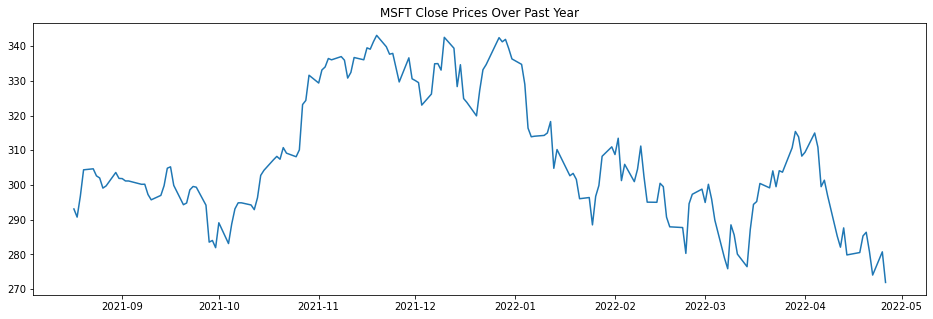

In [26]:
plt.figure(figsize=(16,5))
plt.plot(df['Close'])

plt.title('{} Close Prices Over Past Year'.format(stock))
plt.show()

### Moving Average Convergence/Divergence (MACD)
---
- looking for when the lines cross one another 

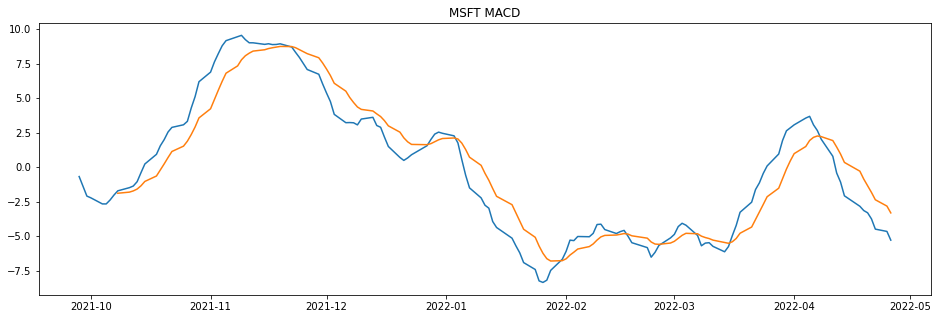

In [24]:
macd = ta.trend.MACD(close=df['Close'], window_slow=30, window_fast=15, window_sign=9)

plt.figure(figsize=(16,5))
plt.plot(macd.macd())
plt.plot(macd.macd_signal())

plt.title('{} MACD'.format(stock))
plt.show()

### Commodity Channel Index (CCI)
---
- measures difference between a securities price change and it's average price change 
    - high change = prices above average (strong)
    - low change = prices below average (weak) 
- positive and hits zero we want to sell 
- negative and hits zero we want to buy 

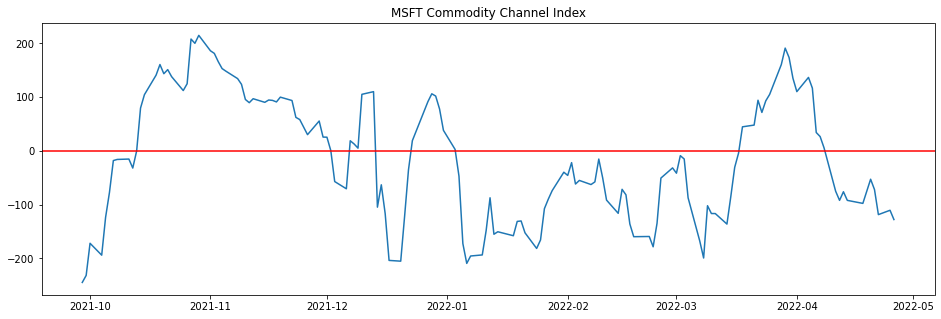

In [19]:
cci = ta.trend.cci(df['High'], df['Low'],df['Close'], window=31, constant=0.015)

plt.figure(figsize=(16,5))
plt.plot(cci)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('{} Commodity Channel Index'.format(stock))
plt.show()